<a href="https://colab.research.google.com/github/SaraKarim23/FuzzySSL-for-Classification-of-Colorectal-Cancer/blob/main/Colorectal_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.svm import SVC
from sklearn import preprocessing
from math import log
from sklearn.metrics import plot_confusion_matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import numpy as np
from math import log

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIET/Colorectal Cancer Patient Data.csv',na_values='?')
#df2 = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/ASD_dataset/ASD_2.csv',na_values='?')

In [ ]:
df.head()

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62,A,Male,Left,108,0,1,0
1,1,GSM877127,77,B,Male,Left,40,1,1,0
2,2,GSM877128,66,C,Female,Left,49,0,1,0
3,3,GSM877129,72,D,Female,Left,45,0,1,1
4,4,GSM877130,75,C,Male,Left,40,0,0,1


In [ ]:
df.info()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.describe()

,Unnamed: 0,Age (in years),DFS (in months),DFS event,Adj_Radio,Adj_Chem
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,30.500000,61.112903,41.774194,0.596774,0.532258,0.483871
std,18.041619,9.581582,26.288076,0.494550,0.503032,0.503819
min,0.000000,28.000000,4.000000,0.000000,0.000000,0.000000
25%,15.250000,56.250000,19.500000,0.000000,0.000000,0.000000
50%,30.500000,62.000000,38.000000,1.000000,1.000000,0.000000
75%,45.750000,67.000000,57.500000,1.000000,1.000000,1.000000
max,61.000000,78.000000,108.000000,1.000000,1.000000,1.000000


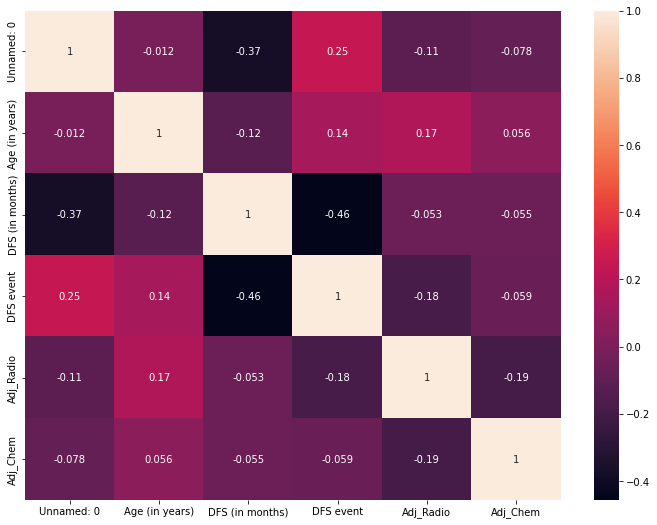

In [ ]:
## Checking correlation between the features
plt.figure(figsize=(12, 9))
corr = df.corr()
sns.heatmap(corr,annot = True)

In [ ]:
df = df.drop(['ID_REF','Dukes Stage'],axis = 1)

In [ ]:
df.head()

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62,A,Male,Left,108,0,1,0
1,1,GSM877127,77,B,Male,Left,40,1,1,0
2,2,GSM877128,66,C,Female,Left,49,0,1,0
3,3,GSM877129,72,D,Female,Left,45,0,1,1
4,4,GSM877130,75,C,Male,Left,40,0,0,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID_REF', 'Age (in years)', 'Dukes Stage', 'Gender',
       'Location', 'DFS (in months)', 'DFS event', 'Adj_Radio', 'Adj_Chem'],
      dtype='object')

In [ ]:
print(df.dtypes)
total = len(df.index)
positive = len(df[df['Dukes Stage']=="Yes"])
negative = len(df[df['Dukes Stage']=="No"])

print ("Total number of records: {}".format(total))
print( "Total number of positive cases:{}".format(positive))
print( "Total number of negative cases:{}".format(negative))

Unnamed: 0          int64
ID_REF             object
Age (in years)      int64
Dukes Stage        object
Gender             object
Location           object
DFS (in months)     int64
DFS event           int64
Adj_Radio           int64
Adj_Chem            int64
dtype: object
Total number of records: 62
Total number of positive cases:0
Total number of negative cases:0


In [ ]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 


In [ ]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)



X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [ ]:
# Normalizing the continuous variables 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Qchat-10-Score', 'Age_Mons']

features_minmax_transform = pd.DataFrame(data = data)
features_minmax_transform[numerical] = scaler.fit_transform(data[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

## Convert target labels. Yes = 1 && No = 0
data['Class/ASD Traits ']= data['Class/ASD Traits '].apply(lambda x: 1 if x == 'Yes' else 0)
plt.hist(data['Class/ASD Traits '],bins=10)
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')
data.info()

In [ ]:
#Spliting the dataset for modelling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:


# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 29))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 240       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=50,
          validation_data=(X_test, y_test),
          verbose=2)

In [ ]:
# Evaluating the model on the training and testing set
score_train = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score_train)

score_test = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score_test)

# Train NNR using labelled data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import numpy as np
from math import log

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 29))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 240       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


             # model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=10,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/10
53/53 - 1s - loss: 0.6698 - accuracy: 0.6928 - val_loss: 0.6451 - val_accuracy: 0.7204
Epoch 2/10
53/53 - 0s - loss: 0.6247 - accuracy: 0.6975 - val_loss: 0.5911 - val_accuracy: 0.7204
Epoch 3/10
53/53 - 0s - loss: 0.5687 - accuracy: 0.7106 - val_loss: 0.5249 - val_accuracy: 0.7299
Epoch 4/10
53/53 - 0s - loss: 0.5032 - accuracy: 0.7284 - val_loss: 0.4651 - val_accuracy: 0.7536
Epoch 5/10
53/53 - 0s - loss: 0.4473 - accuracy: 0.7651 - val_loss: 0.4155 - val_accuracy: 0.7773
Epoch 6/10
53/53 - 0s - loss: 0.3947 - accuracy: 0.8197 - val_loss: 0.3718 - val_accuracy: 0.8199
Epoch 7/10
53/53 - 0s - loss: 0.3609 - accuracy: 0.8458 - val_loss: 0.3296 - val_accuracy: 0.8720
Epoch 8/10
53/53 - 0s - loss: 0.3073 - accuracy: 0.8802 - val_loss: 0.2935 - val_accuracy: 0.9052
Epoch 9/10
53/53 - 0s - loss: 0.2775 - accuracy: 0.8992 - val_loss: 0.2618 - val_accuracy: 0.9289
Epoch 10/10
53/53 - 0s - loss: 0.2452 - accuracy: 0.9110 - val_loss: 0.2354 - val_accuracy: 0.9384


#Use the classifier to get the membership vector of each unlabelled sample

In [ ]:
membershipVectors = model.predict(X_test) # Membership Matrix

In [ ]:
membershipVectors.shape

(211, 1)

In [ ]:
binarizedLabels = (membershipVectors == membershipVectors.max(axis=1, keepdims=1)).astype(float)
binarizedLabels = np.delete(binarizedLabels,0,1)

# Calculate Fuzziness using the following equation:
$F(V)=-\frac{1}{n}\sum_{i=1}^{n}(\mu_{i}\log\mu_{i} + (1 - \mu_{i})\log(1 - \mu_{i}))$

In [ ]:
def F(V):
    def inner(mu):
        return (mu * log(mu, 2)) + ((1 - mu) * log(1 - mu, 2))
    return - np.mean(list(map(inner, V)))

fuzziness = np.array(list(map(F, membershipVectors)))

In [ ]:
print(fuzziness[0])

0.9006335426902305


# Add samples with low and high fuzziness to the training set

In [ ]:
lowFuzzinessIndices = np.append(np.where( fuzziness >= 0.95), np.where( fuzziness <= 0.05 ) )
highFuzzinessIndices = np.logical_and(fuzziness >= 0.45, fuzziness <= 0.52)

# Fuzziness values >= 5/6
lowFuzzinessGroup = X_test.iloc[ lowFuzzinessIndices ]
lowFuzzinessLabels = binarizedLabels[ lowFuzzinessIndices ].squeeze()

# Fuzziness values 2/6 <= x <= 2/3
highFuzzinessGroup = X_test.iloc[ highFuzzinessIndices ]
highFuzzinessLabels = binarizedLabels[ highFuzzinessIndices ].squeeze()

# Append new samples to training set
#train_set_x = np.concatenate((x_train,lowFuzzinessGroup, highFuzzinessGroup), axis=0)

#train_set_y = np.concatenate((y_train,lowFuzzinessLabels, highFuzzinessLabels), axis=0)

In [ ]:
# Append new samples to training set
#X_train = np.concatenate((X_train,lowFuzzinessGroup, highFuzzinessGroup), axis=1)

#y_train = np.concatenate((y_train,lowFuzzinessLabels, highFuzzinessLabels), axis=1)

# Retrain the classifier with the new training set

In [ ]:
# Evaluating the model on the training and testing set
score_train = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score_train)

score_test = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score_test)

27/27 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9431

 Training Accuracy: [0.2013450413942337, 0.9430605173110962]

 Testing accuracy:  [0.2353857457637787, 0.9383886456489563]


# Evaluation

In [ ]:
score = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9384


In [ ]:
print("Final Accuracy: ", score[1])

Final Accuracy:  0.9383886456489563


# Fuzzy MinMax Classifier

In [ ]:
!git clone https://github.com/Cartmanishere/fuzzy-min-max-classifier.git

Cloning into 'fuzzy-min-max-classifier'...
remote: Enumerating objects: 29, done.
remote: Total 29 (delta 0), reused 0 (delta 0), pack-reused 29
Unpacking objects: 100% (29/29), done.


In [ ]:
%cd /content/fuzzy-min-max-classifier

/content/fuzzy-min-max-classifier


In [ ]:
from fuzzy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

In [ ]:
X = data.drop(['Class/ASD Traits '],1)
y = data['Class/ASD Traits ']

In [ ]:
#Spliting the dataset for modelling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)
#rescaledX_unlabel = scaler.fit_transform(unlabel_x)

print(rescaledX_train.shape)
print(rescaledX_test.shape)
#print(rescaledX_unlabel.shape)

In [ ]:
fuz = FuzzyMMC(sensitivity=1, exp_bound=0.1, animate=False)
fuz.fit(rescaledX_train, y_train)


In [ ]:
accuracy = fuz.score(rescaledX_test, y_test)*100
print(accuracy)

91.4691943127962
